# In-Class Exercise #2 - Probability and Statistics

In this exercise we will load and examine three different sets of data generated by sampling different PDFs.
This data is available in data files (`pdfa.npy`, `pdfb.npy`, `pdfc.npy`) 

For any of the requested steps, ✅ - indicates that this step is already done for you

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Part A: Loading and visualizing the data

For all three data files (`pdfa.npy`, `pdfb.npy`, `pdfc.npy`):

1. Read in the entire file (hint: `np.fromfile()` ). ✅
2. Determine how many numbers are in the file (hint: `np.size()` ).
3. Find the maximum and minimum values in the data (hint: `np.max()` and `np.min()` ).
4. Plot a histogram of the frequency of the scores in 20 bins over a reasonable domain (hint: `plt.hist()` ). ✅


In [5]:
def load_and_plot(filename, label):
    """
    Parameters
    ----------
    filename - string for the MAT-file to be loaded

    label    - string to use when describing the data

    Returns
    -------
    An 1D array of numbers that represent the data
    """

    pdf = np.fromfile(filename)

    # A.1 Determine how many numbers are in the file
    pdf_len = np.size(pdf)

    # A.2 Determine the maximum and minimum values in the file
    mx = np.max(pdf)
    mn = np.min(pdf)

    print(f'Distribution {filename} has {pdf_len} values between {mx} and {mn}')

    # A.4 Plot a historgram of the frequency of the scores in 20 bins over a reasonable domain
    plt.figure()
    plt.title(label)
    plt.hist(pdf, bins=20)
    plt.show()

Distribution pdfa.npy has 1000000 values between 0.9993480237387277 and 0.00036518587533972


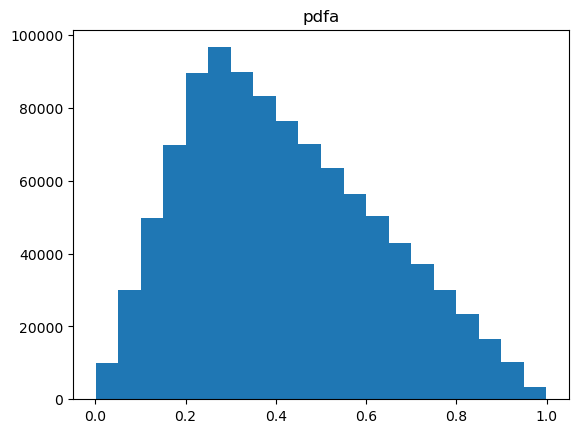

In [6]:
load_and_plot('pdfa.npy', 'pdfa')

Distribution pdfb.npy has 1000000 values between 0.9999988823819409 and 5.334420002267591e-07


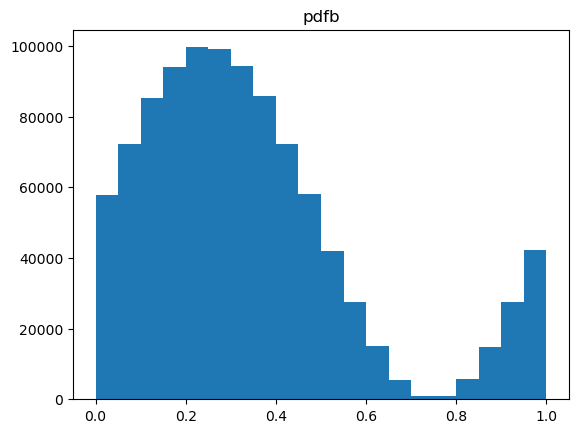

In [7]:
load_and_plot('pdfb.npy', 'pdfb')

Distribution pdfc.npy has 1000000 values between 0.9999928899872154 and 1.6896148828634314e-07


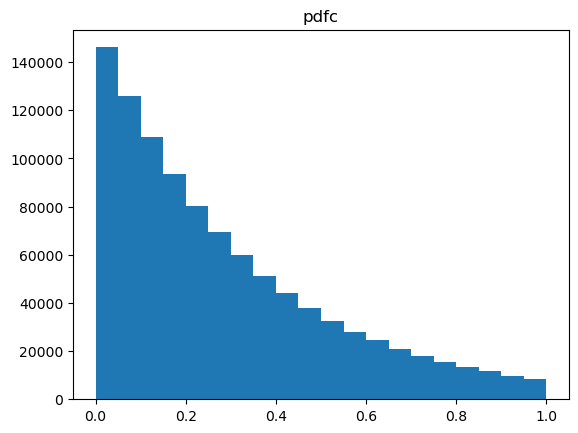

In [8]:
load_and_plot('pdfc.npy', 'pdfc')

### Analysis & Questions:

 - Which PDF appears to have a higher mean value?
 
 **ANSWER:** visually, it appears that PDF A will have the highest mean value.
    
 - Which PDF appears to have a higher standard deviation?
 
 **ANSWER:** visually, it appears that PDF B will have the highest std deviation.
 
 Submit Jupyter Notebook to Canvas when finished
     

## Part B: Analyzing the Data

It is possible to calculate the mean and variance for any data set representing a PDF using:

Mean: $ \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i $

Variance (of the PDF):  $ \sigma_{x}^{2} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2 = \frac{1}{N} \sum_{i=1}^{N} x_i^2 - ( \frac{1}{N} \sum_{i=1}^{N} x_i)^2 = \bar{x^2} - \bar{x}^2$

It is also useful to quantify the accuracy of the mean estimate that is generated. 

### Background

This can be accomplished using the standard deviation of the mean (also called the standard error). The standard error describes the *dispersion of the mean for many subsets of the data*. There are two ways to determine the standard error:

1. It is possible to estimate the standard error using the variance (of the PDF) from a single data set of size N using $\sigma_{\bar{x}}^{2} = \frac{\sigma_x^2}{N} $.

2. If many independent data sets of length N are used to estimate the mean, there are many estimates of the true mean (all grouped around the true mean, $\mu$).  From these estimates, we can directly calculate the variance of those estimates of the mean.

### Your Tasks
In the Jupyter notebook, add to the template in order to do the following for all three data files:

1. Using all the data, calculate the mean value without using the `np.mean()` function.

2. Using all the data, calculate the standard deviation without using the `np.std()` function. Compare this to the standard deviation calculated using the built-in `np.std()` function.
   
3. Divide the data into 20 equally sized sets (✅).  For each of the 20 data sets:
   
  - estimate the mean value, the standard deviation (which describes the dispersion of the data), and the standard error (which describes the dispersion of the means).
  - Calculate the standard error in two ways:
      1. using the standard deviation of the PDF data and the sample size
      2. using the standard deviation of the 20 mean values. You may use the built-in functions
  - plot a histogram of the 20 mean values. ✅


In [11]:
def batch_statistics(pdf, numSets, numBins, label):
    """
    Calculate the mean and standard deviation of a vector of data sampled
    from a PDF.
    Divide that vector of data in subsets of equal size and calculate the
    mean and standard deviation of each subset, as well as the standand
    deviation of the set of mean values.

    Parameters
    ----------
    pdf     - a vector of numbers that is the data
    numSets - the number of subsets to analyze
    numBins - the number of histogram bins
    label   - string to use when describing the data
    """

    # B.1 Using all the data, calculate the mean value
    size = pdf.size
    my_mean = np.sum(pdf)/size
    mean = np.mean(pdf)

    # B.2 Using all the data, calculate the standard deviation
    my_std_dev = np.sqrt(np.sum((pdf - my_mean)**2)/size)
    std_dev = np.std(pdf)

    # B.3 Divide the data set into 20 equally sized subsets
    subsets = np.array_split(pdf, numSets)

    set_size = subsets[0].size

    # the mean of each subset provides an independent estimate of the
    # mean of this PDF

    # estimate the mean of each subset
    means = np.mean(subsets, axis=1)

    # the standard deviation of each subset provides an independent
    # estimate of the standard deviation of this PDF

    # estimate the standard deviation of the means of each subset
    stds = np.std(subsets, axis=1)

    # the standard error can be determined in two ways:

    # 1) by the relationship between the standard deviation and standard error
    #    for a sample size N

    # estimate the standard error of the mean of the whole data set
    stde = stds/np.sqrt(size)

    # 2) by evaulating the standard deviation of a set of independent estimates
    #    of the mean

    # calculate the standard deviation of the subset means
    mean_of_subset_means = np.mean(means)
    mean_of_subset_std_devs = np.mean(stds)
    
    # Calculate the standard deviation of the set of means
    std_of_subset_means = np.std(means)

    # Print the results
    print(f'For PDF{label} data broken into {numSets} subsets:')
    print(f'  Mean of entire data set: {mean}')
    print(f'  Standard deviation of entire data set: {std_dev}')
    print()
    print(f'  Mean of means of subsets: {mean_of_subset_means}')
    print(f'  Mean of the std. dev. of each subset: {mean_of_subset_std_devs}')
    print(f'  Standard deviation of the subset means: {std_of_subset_means}')

    print(f'Max variation of subset means from the "true" mean: {np.max(np.abs(means - mean))}')

    # generate a gaussian around the true mean with a width based on the std. dev.
    height = 1 /(std_of_subset_means * np.sqrt( 2 * np.pi))
    six_sigma = 3 * std_of_subset_means
    gauss_xs = np.linspace(mean - six_sigma, mean + six_sigma, 500)
    gauss_ys = height * np.exp(-0.5 * (gauss_xs-mean)**2 / std_of_subset_means**2)
    
    # Plot the results
    plt.figure()
    plt.hist(means, numBins, density=True)
    plt.xlabel('Mean')
    plt.ylabel('Frequency')
    plt.plot(gauss_xs, gauss_ys)
    # plt.xlim(mean - 0.1, mean + 0.1)
    plt.vlines(mean, 0, height, colors=['black'], linestyle='dashed')
    plt.show()

For PDFA data broken into 1000 subsets:
  Mean of entire data set: 0.4168477965286413
  Standard deviation of entire data set: 0.21233695605511613

  Mean of means of subsets: 0.4168477965286413
  Mean of the std. dev. of each subset: 0.21220165842809116
  Standard deviation of the subset means: 0.006480052599345959
Max variation of subset means from the "true" mean: 0.0203720393256977


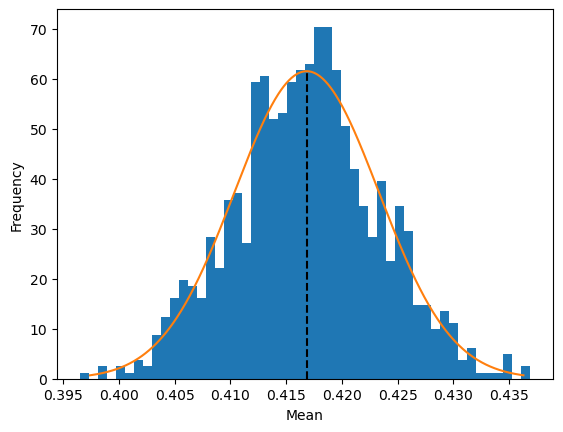

For PDFB data broken into 1000 subsets:
  Mean of entire data set: 0.3411333102151836
  Standard deviation of entire data set: 0.24090014559561515

  Mean of means of subsets: 0.3411333102151838
  Mean of the std. dev. of each subset: 0.24068877264363506
  Standard deviation of the subset means: 0.00745258440469655
Max variation of subset means from the "true" mean: 0.02447324461993655


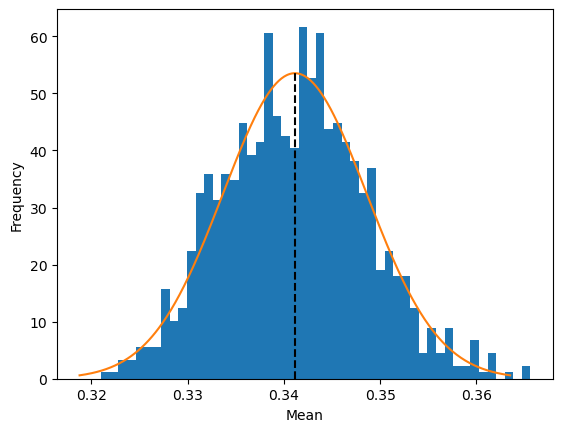

For PDFC data broken into 1000 subsets:
  Mean of entire data set: 0.28118070583540306
  Standard deviation of entire data set: 0.2366058108056208

  Mean of means of subsets: 0.28118070583540294
  Mean of the std. dev. of each subset: 0.2364250591118105
  Standard deviation of the subset means: 0.007286986299161917
Max variation of subset means from the "true" mean: 0.02420853505661047


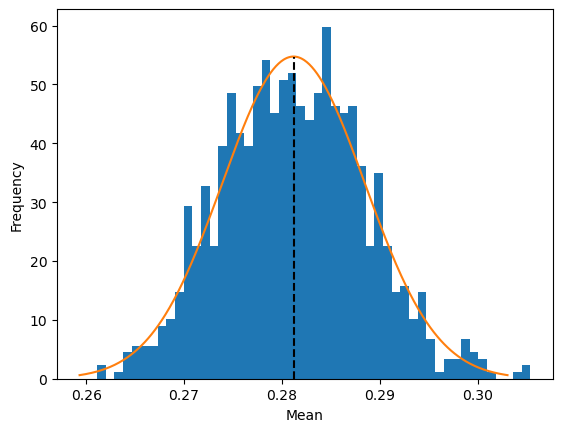

In [12]:
num_sets = 1000
num_hist_bins = 50
pdf = np.fromfile('pdfa.npy')
batch_statistics(pdf, num_sets, num_hist_bins, 'A')
pdf = np.fromfile('pdfb.npy')
batch_statistics(pdf, num_sets, num_hist_bins, 'B')
pdf = np.fromfile('pdfc.npy')
batch_statistics(pdf, num_sets, num_hist_bins, 'C')

## Analysis and Questions

 - Does the distribution of the mean values match your expectation 
   based on your estimates of the standard error?

**ANSWER:** Yes. I expected the set of mean values to be distributed according
to a Normal distribution with a std deviation equal to the std deviation of
the set of mean values.

 - Would your expectations be better or worse matched if you divided 
   the same sets of data into 200 equally sized sets instead of 50? 1000?

**ANSWER:** As the number of subsets increases, the histogram will become
more smooth, but the width of the histogram and associated Normal distribution
be be larger because the std deviation will be larger, as fewer values are
used to estimate each mean.


Please submit your Jupyter notebook files to Canvas upon completion.